<a href="https://colab.research.google.com/github/Cchancee/summative_into_to_ml/blob/main/Summative_Intro_to_ml_Chance_Karambizi_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [20]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.regularizers import l1, l2

# The Dataset
> ***Brief Description:***
We aim to predict the most suitable career for individuals based on their age, education level, skills, and interests. Using classification models, the system will recommend a career path with high confidence, helping users make data-driven professional decisions.

> **Dataset Overview:**
- **Total Records:** 300
- **Format:** CSV
- **Target Column:** `Recommended_Career`
- **Features:**
  - `Age`: Numeric (22–45)
  - `Education`: Categorical (Bachelor's, Master's, PhD)
  - `Skills`: Multi-label text (e.g., "Python, Data Analysis, AI")
  - `Interests`: Multi-label text (e.g., "Technology, Data Science")
  - `Recommendation_Score`: Confidence level (not used in training)



In [21]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)


# Load data
df = pd.read_csv("Career Recommendation.csv")

# Drop irrelevant stuff
df.drop(["CandidateID", "Name", "Recommendation_Score"], axis=1, inplace=True)

# Handle Education
le_edu = LabelEncoder()
df["Education"] = le_edu.fit_transform(df["Education"])

# Convert Skills and Interests to list
df["Skills"] = df["Skills"].apply(lambda x: [i.strip() for i in x.split(";")])
df["Interests"] = df["Interests"].apply(lambda x: [i.strip() for i in x.split(";")])

# Multi-hot encode Skills & Interests
mlb_skills = MultiLabelBinarizer()
mlb_interests = MultiLabelBinarizer()

skills_df = pd.DataFrame(mlb_skills.fit_transform(df["Skills"]), columns=mlb_skills.classes_)
interests_df = pd.DataFrame(mlb_interests.fit_transform(df["Interests"]), columns=mlb_interests.classes_)

# Combine all
df_final = pd.concat([df.drop(["Skills", "Interests"], axis=1), skills_df, interests_df], axis=1)

# Encode target
le_target = LabelEncoder()
df_final["Recommended_Career"] = le_target.fit_transform(df_final["Recommended_Career"])

# Split
X = df_final.drop("Recommended_Career", axis=1)
y = df_final["Recommended_Career"]

# Filter out classes that appear less than 2 times
class_counts = y.value_counts()

# Optional: drop classes with <5 samples just to be safe
rare_classes = y.value_counts()[y.value_counts() < 5].index
X = X[~y.isin(rare_classes)]
y = y[~y.isin(rare_classes)]

# Now split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```

In [22]:
from google.colab import files
uploaded = files.upload()


Saving Model architecture.png to Model architecture (1).png


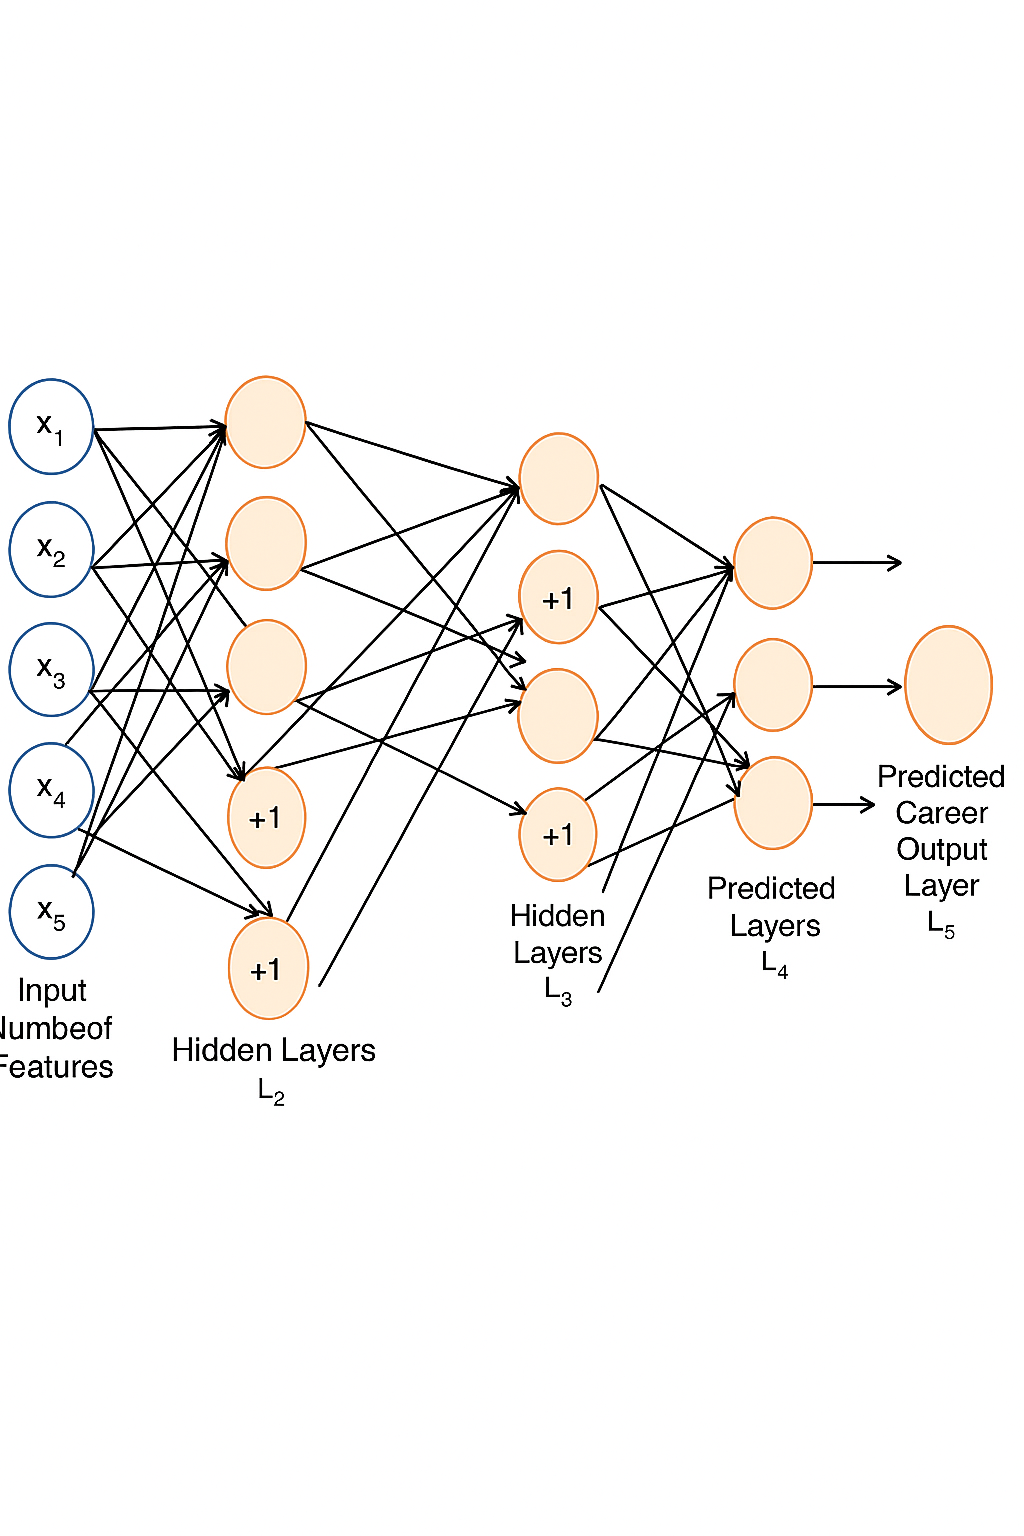

In [23]:
from IPython.display import Image
Image("Model architecture.png", width=500)

#Task: Define a function that creates models without and With specified Optimization techniques


In [24]:
# convert to categorical
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

input_dim = X_train.shape[1]
output_dim = y_train_cat.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(output_dim, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=20, batch_size=16, validation_data=(X_val, y_val_cat))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0508 - loss: 7.0434 - val_accuracy: 0.0500 - val_loss: 6.4493
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0561 - loss: 5.9806 - val_accuracy: 0.1000 - val_loss: 5.4653
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1272 - loss: 5.0547 - val_accuracy: 0.1500 - val_loss: 4.8749
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1537 - loss: 4.5176 - val_accuracy: 0.1500 - val_loss: 4.3794
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1954 - loss: 3.9331 - val_accuracy: 0.1500 - val_loss: 3.9928
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1247 - loss: 3.3575 - val_accuracy: 0.2000 - val_loss: 3.7062
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1452 - loss: 3.4210 - val_accuracy: 0.2000 - val_loss: 3.4356
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0968 - loss: 3.3190 - val_accuracy: 0.2000 - val_loss: 3.1986
Epoch 9/20


# Task: Print out the Final Model Accuracy and plot the Loss curve

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Accuracy: 0.2857142857142857
Precision: 0.18000000000000002
Recall: 0.2
F1 Score: 0.16666666666666666


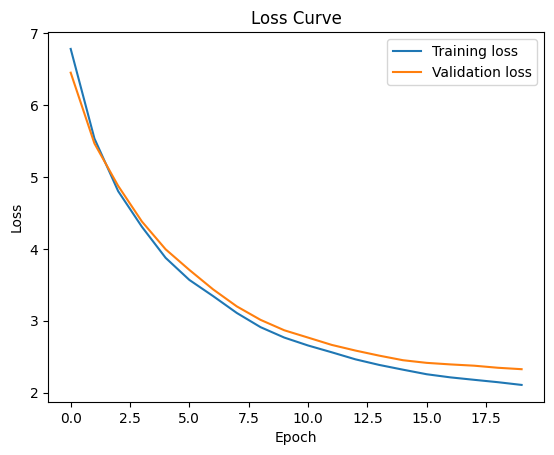

In [25]:

y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro', zero_division=0))
print("Recall:", recall_score(y_true, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_true, y_pred, average='macro', zero_division=0))

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)
model.save("best_model.keras")

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Training Model...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.1157 - loss: 4.7130 - val_accuracy: 0.1500 - val_loss: 3.6665
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1692 - loss: 3.8399 - val_accuracy: 0.1000 - val_loss: 3.3027
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1708 - loss: 3.9436 - val_accuracy: 0.1500 - val_loss: 3.2223
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1650 - loss: 3.6949 - val_accuracy: 0.1500 - val_loss: 3.0968
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1742 - loss: 3.5544 - val_accuracy: 0.1500 - val_loss: 3.0570
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1812 - loss: 3.5692 - val_accuracy: 0.1500 - val_loss: 3.0265
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2415 - loss: 3.4868 - val_accuracy: 0.1500 - val_loss: 3.0072
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1845 - loss: 3.3898 - val_accuracy: 0.1500 - val_loss: 3.0795
Epoc

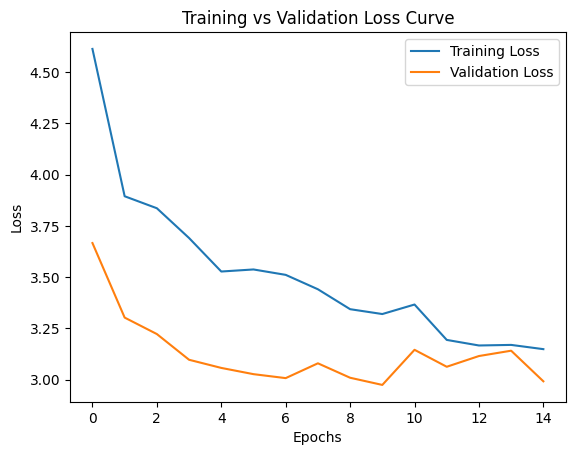

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
 Overall Model Performance:
Accuracy: 0.14285714285714285
Precision: 0.009523809523809523
Recall: 0.06666666666666667
F1 Score: 0.016666666666666666


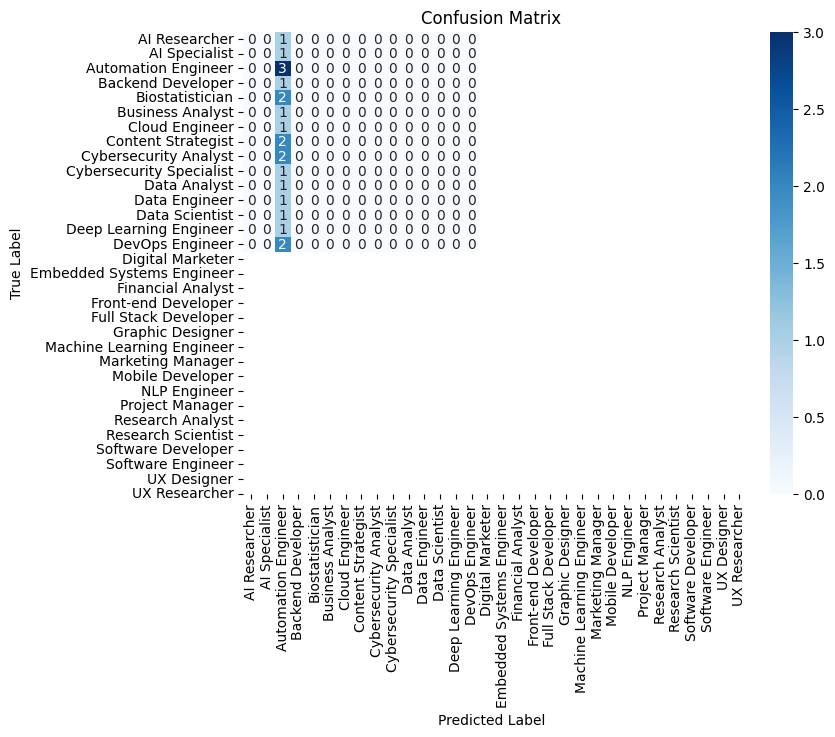

In [26]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

def define_model(
    optimizer='Adam',
    regularizer=l2(0.001),
    early_stopping=True,
    dropout=0.3,
    learning_rate=0.01,
    batch_size=16,
    epochs=100
):
    model = Sequential()
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
    model.add(Dropout(dropout))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(len(le_target.classes_), activation='softmax'))

    opt = Adam(learning_rate=learning_rate) if optimizer == 'Adam' else None

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

    print("Training Model...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1,
        class_weight=class_weights_dict
    )
    return model, history


def loss_curve_plot(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def print_metrics(model, X_test, y_test):
    y_pred_probs = model.predict(X_test)
    y_pred = y_pred_probs.argmax(axis=1)

    print(" Overall Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro',  zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='macro',  zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro',  zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Run the first model
model_2, history_2 = define_model()

loss_curve_plot(history_2)
print_metrics(model_2, X_test, y_test)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.0542 - loss: 6.8426 - val_accuracy: 0.1500 - val_loss: 5.2393
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0743 - loss: 6.2748 - val_accuracy: 0.1500 - val_loss: 5.0565
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0713 - loss: 5.8202 - val_accuracy: 0.1500 - val_loss: 4.9970
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0874 - loss: 5.6492 - val_accuracy: 0.1500 - val_loss: 4.8991
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1006 - loss: 5.3993 - val_accuracy: 0.1500 - val_loss: 4.8442
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0767 - loss: 5.5394 - val_accuracy: 0.1500 - val_loss: 4.8052
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0488 - loss: 5.5102 - val_accuracy: 0.1500 - val_loss: 4.7513
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1099 - loss: 5.2847 - val_accuracy: 0.1500 - val_loss: 4.6929
Epoch 9/50

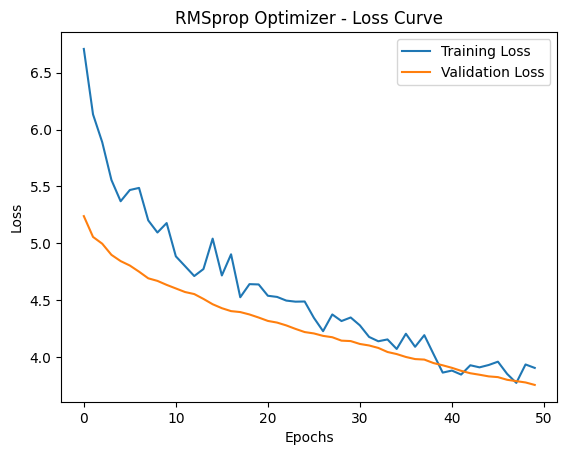

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
 Overall Model Performance:
Accuracy: 0.14285714285714285
Precision: 0.009523809523809523
Recall: 0.06666666666666667
F1 Score: 0.016666666666666666


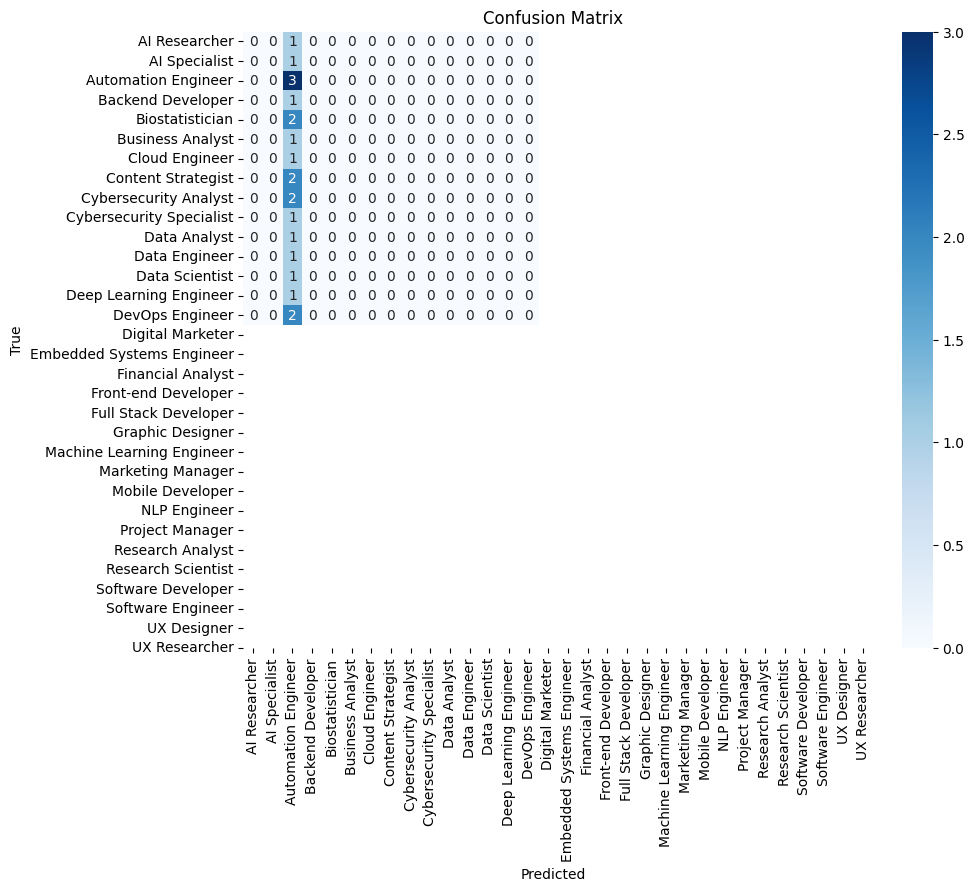

In [27]:
# Define the model using RMSprop and tuned hyperparameters
def define_model_rmsprop(regularizer=l1(0.001), early_stopping=True, dropout=0.5, learning_rate=0.0005):
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train.shape[1],)))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(len(le_target.classes_), activation='softmax'))

    opt = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3))

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=callbacks, verbose=1)
    return model, history


# Plot loss curve with title
def loss_curve_plot(history, title="Loss Curve"):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Print classification metrics with titles
def print_metrics(model, X_test, y_test, title="Classification Report & Confusion Matrix"):
    y_pred_probs = model.predict(X_test)
    y_pred = y_pred_probs.argmax(axis=1)

    print(" Overall Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro',  zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='macro',  zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro',  zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_target.classes_, yticklabels=le_target.classes_, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Run model with RMSprop
model_3, history_3 = define_model_rmsprop()
loss_curve_plot(history_3, title="RMSprop Optimizer - Loss Curve")
print_metrics(model_3, X_test, y_test, title="RMSprop Optimizer - Metrics")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.1016 - loss: 4.5203 - val_accuracy: 0.1500 - val_loss: 3.3414
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1138 - loss: 3.3755 - val_accuracy: 0.1500 - val_loss: 3.1566
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1451 - loss: 3.2817 - val_accuracy: 0.1500 - val_loss: 2.9299
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0860 - loss: 3.0851 - val_accuracy: 0.1500 - val_loss: 2.8354
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1182 - loss: 2.8819 - val_accuracy: 0.1500 - val_loss: 2.8652
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1426 - loss: 2.8152 - val_accuracy: 0.1500 - val_loss: 2.7778
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1363 - loss: 2.7512 - val_accuracy: 0.1500 - val_loss: 2.7657
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1270 - loss: 2.7364 - val_accuracy: 0.1500 - val_loss: 2.8015
Epoch 9/30

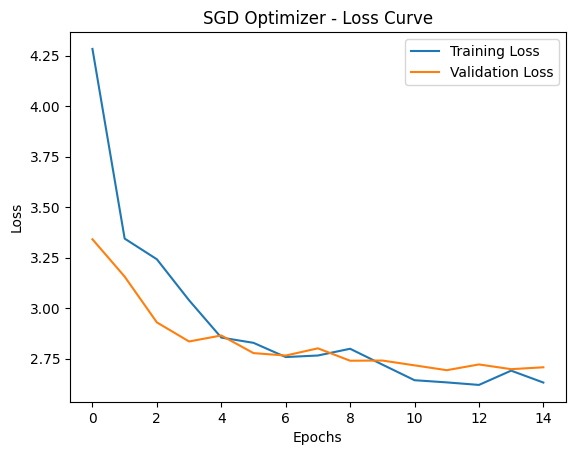

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
 Overall Model Performance:
Accuracy: 0.14285714285714285
Precision: 0.009523809523809523
Recall: 0.06666666666666667
F1 Score: 0.016666666666666666


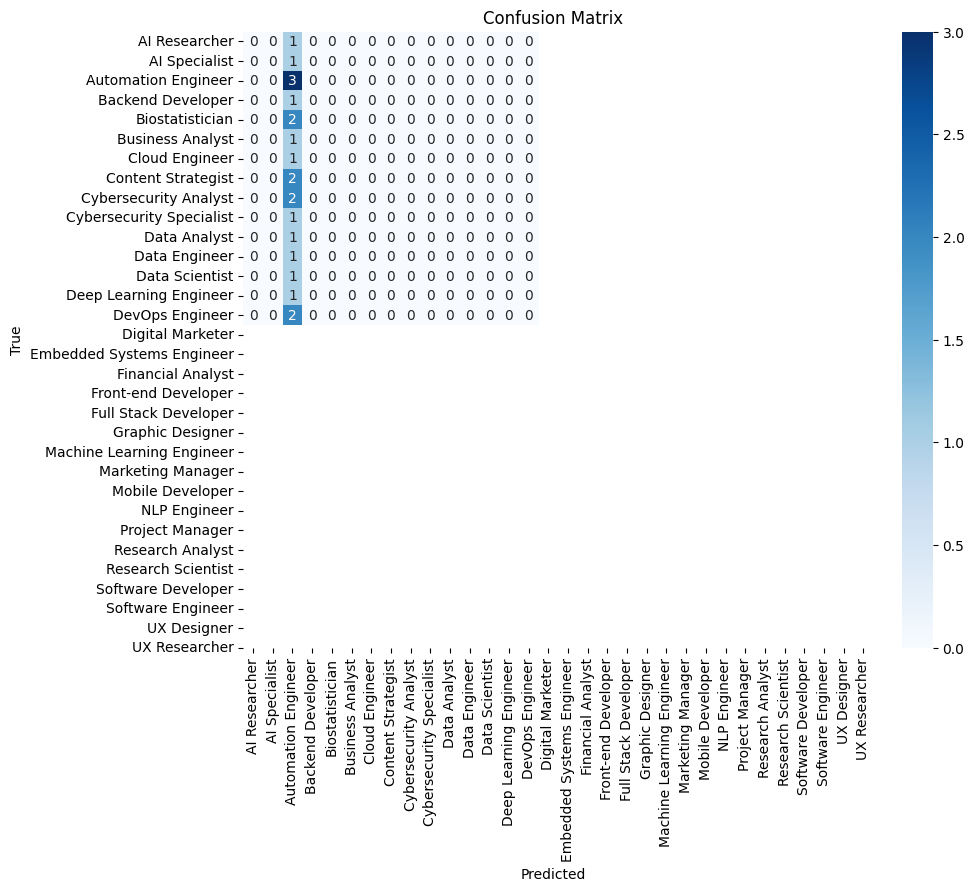

In [28]:
# Define the model using SGD and tuned hyperparameters
def define_model_sgd(regularizer=None, early_stopping=True, dropout=0.2, learning_rate=0.01, momentum=0.9):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(le_target.classes_), activation='softmax'))

    opt = SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3))

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, callbacks=callbacks, verbose=1)
    return model, history

# Plot loss curve with title
def loss_curve_plot(history, title="Loss Curve"):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Print classification metrics with titles
def print_metrics(model, X_test, y_test, title="Classification Report & Confusion Matrix"):
    y_pred_probs = model.predict(X_test)
    y_pred = y_pred_probs.argmax(axis=1)

    print(" Overall Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_target.classes_, yticklabels=le_target.classes_, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Run model with SGD
model_4, history_4 = define_model_sgd()
loss_curve_plot(history_4, title="SGD Optimizer - Loss Curve")
print_metrics(model_4, X_test, y_test, title="SGD Optimizer - Metrics")


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [29]:
# Function to load and make predictions
def make_predictions(model_path, X):
    model = load_model(model_path)
    y_pred_probs = model.predict(X)
    predictions = np.argmax(y_pred_probs, axis=1)
    return predictions


In [30]:
model_path = "best_model.keras"
y_pred_best = make_predictions(model_path, X_test)

# Evaluate
print("Best Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_best, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_best, average='macro', zero_division=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Best Model Evaluation:
Accuracy: 0.2857142857142857
Precision: 0.18000000000000002
Recall: 0.2
F1 Score: 0.16666666666666666


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  Fi


Tuned Logistic Regression - Overall Performance:
Accuracy: 0.42857142857142855
Precision: 0.3377777777777778
Recall: 0.4111111111111111
F1 Score: 0.36444444444444446


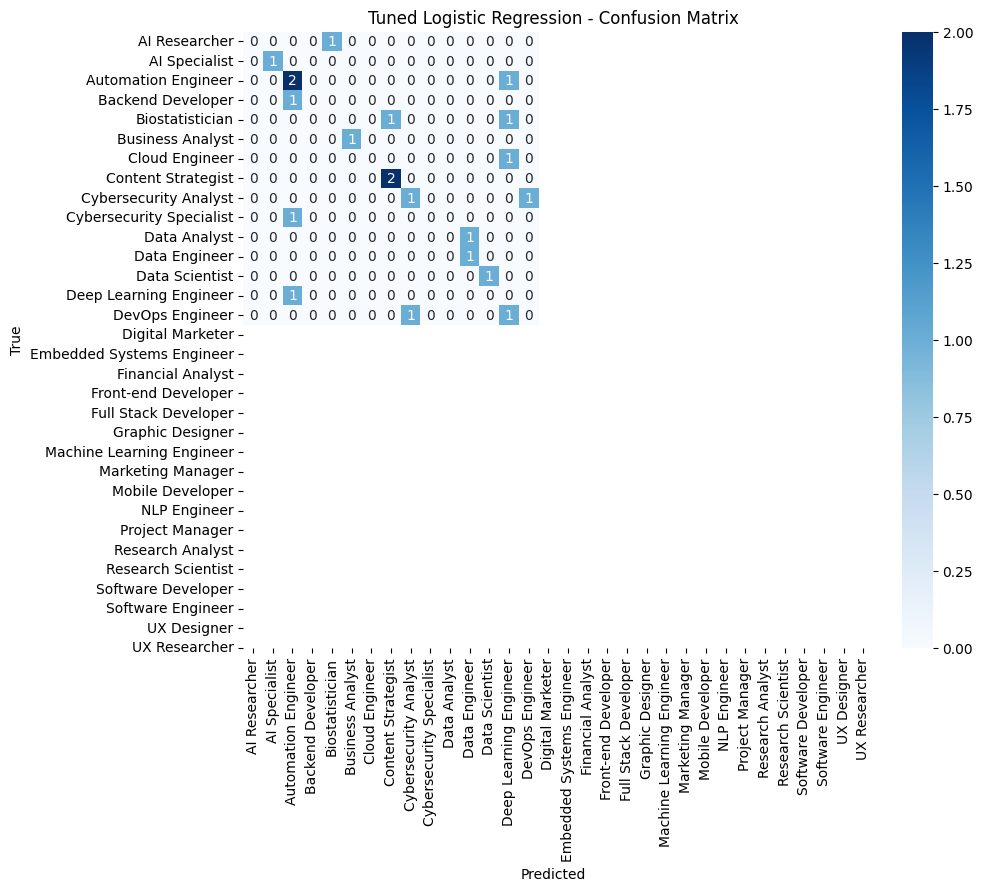

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'max_iter': [500, 1000]
}

logreg = LogisticRegression(multi_class='multinomial')

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


# Use best model
best_log_model = grid_search.best_estimator_
y_pred = best_log_model.predict(X_test)

print("\nTuned Logistic Regression - Overall Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='macro', zero_division=0))

# Conf Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_target.classes_, yticklabels=le_target.classes_, cmap='Blues')
plt.title("Tuned Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [36]:
# Step 1: Make the folder structure
!mkdir -p saved_models

# Step 2: Save your models
model.save('saved_models/model_1.keras')
model_2.save('saved_models/model_2.keras')
model_3.save('saved_models/model_3.keras')
model_4.save('saved_models/model_4.keras')

import joblib

import os
os.makedirs("saved_models", exist_ok=True)

joblib.dump(best_log_model, 'saved_models/logistic_regression_model.joblib')



['saved_models/logistic_regression_model.joblib']

Congratulations!!
